# 1) Se cargan las librerias necesarias

In [ ]:
# Librerías estándar y manipulación de archivos
import os
import joblib
import json
import pickle

# Manipulación de datos y operaciones básicas
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reducción de dimensionalidad
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Selección y validación de modelos
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV, StratifiedKFold

# Técnicas de balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.pipeline import Pipeline

# Métricas de evaluación
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc

# Configuraciones adicionales
import warnings

# Se ignoran los warnings en el notebook
warnings.filterwarnings('ignore')



# 2) Carga y visualización de la base de datos

In [ ]:
medical_appointments = pd.read_csv('Attendance of Medical Appointments in Brazil (may2016).csv')
# Numero de filas y columnas
medical_appointments.shape

(110527, 14)

In [ ]:
# Información de las columnas
medical_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Numero de valores unicos por columna
column_counts = medical_appointments.nunique()
print(column_counts)

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [ ]:
# Evaluar presencia de Missing values
missing_values = medical_appointments.isnull().sum()
print(missing_values)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [ ]:
# Tipo de datos
data_types = medical_appointments.dtypes
print(data_types)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


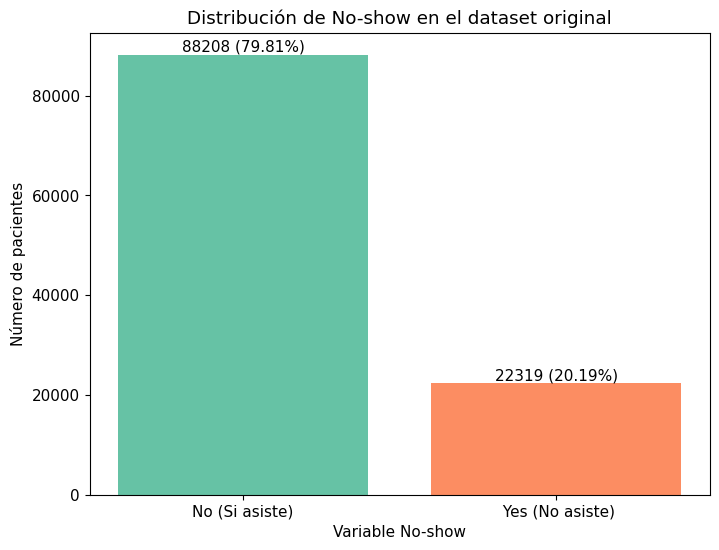

In [ ]:
# Distribución del dataset original
class_counts = medical_appointments['No-show'].value_counts()

plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.bar(x=class_counts.index,
        height=class_counts.values,
        tick_label=['No (Si asiste)', ' Yes (No asiste)'],
        color = ['#66c2a5', '#fc8d62'])

# Añadir etiquetas a las barras
for i, value in enumerate(class_counts.values):
    plt.text(i, value, f'{value} ({value / len(medical_appointments) * 100:.2f}%)', ha='center', va='bottom')

# Configura el título del gráfico
plt.title('Distribución de No-show en el dataset original')
plt.xlabel('Variable No-show')
plt.ylabel('Número de pacientes')

# Muestra el gráfico
plt.show()

In [ ]:
# Numero de citas por paciente
appointment_counts = medical_appointments['PatientId'].value_counts()

# Crear una serie que cuente cuántos pacientes tienen X número de citas
appointment_counts_summary = appointment_counts.value_counts().sort_index()

# Convertir la serie appointment_counts_summary a un DataFrame y restablecer el índice
appointment_counts_summary_df = pd.DataFrame({'num_citas': appointment_counts_summary.index, 'num_pacientes': appointment_counts_summary.values})

# Aplicar una expresión lambda a la columna 'num_citas' para obtener la columna 'agrupacion_num_citas'
appointment_counts_summary_df['agrupacion_num_citas'] = appointment_counts_summary_df['num_citas'].apply(lambda x: str(x) if x < 10 else 'Más de 10')

# Verificar el DataFrame con la nueva columna agregada
print(appointment_counts_summary_df)


    num_citas  num_pacientes agrupacion_num_citas
0           1          37920                    1
1           2          13895                    2
2           3           5500                    3
3           4           2367                    4
4           5           1119                    5
5           6            553                    6
6           7            306                    7
7           8            202                    8
8           9            104                    9
9          10             85            Más de 10
10         11             63            Más de 10
11         12             36            Más de 10
12         13             35            Más de 10
13         14             22            Más de 10
14         15             15            Más de 10
15         16             10            Más de 10
16         17             10            Más de 10
17         18              8            Más de 10
18         19              6            Más de 10


In [ ]:
appointment_counts_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   num_citas             44 non-null     int64 
 1   num_pacientes         44 non-null     int64 
 2   agrupacion_num_citas  44 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
unique_values = appointment_counts_summary_df['agrupacion_num_citas'].unique()
print(unique_values)

['1' '2' '3' '4' '5' '6' '7' '8' '9' 'Más de 10']


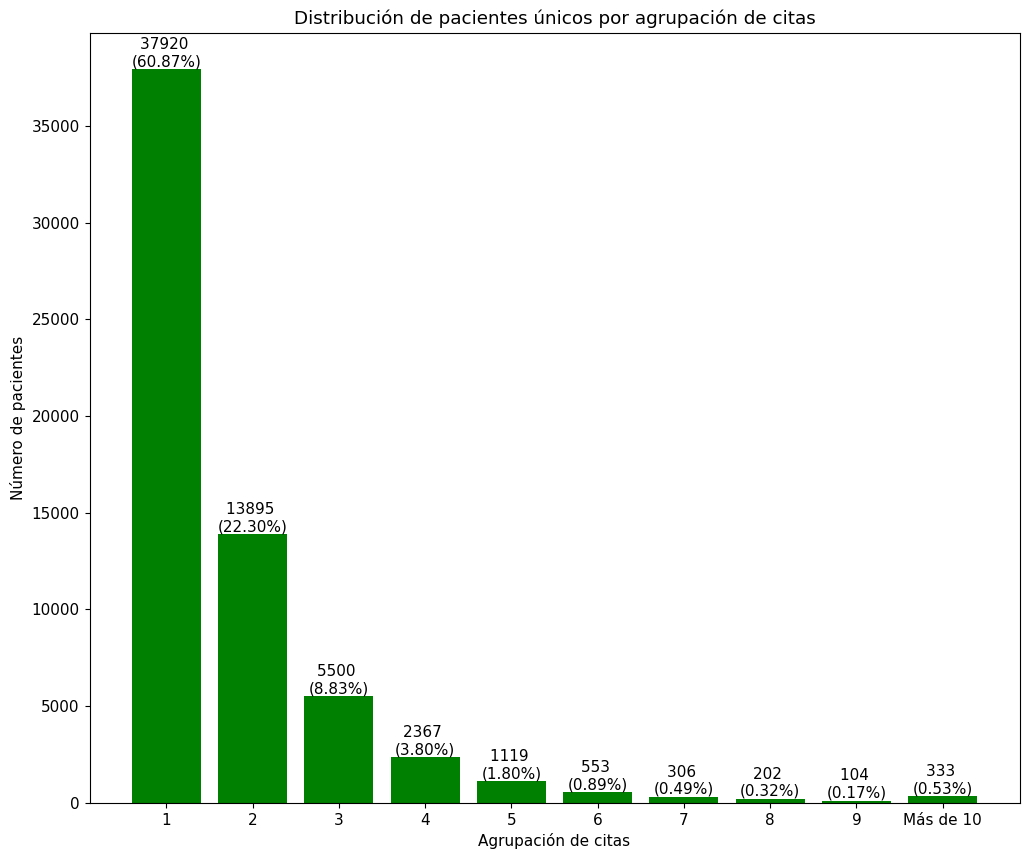

In [ ]:
# Convertir 'agrupacion_num_citas' a tipo Categorical para conservar el orden
appointment_counts_summary_df['agrupacion_num_citas'] = pd.Categorical(appointment_counts_summary_df['agrupacion_num_citas'],
                                                                       categories=[str(i) for i in range(1, 10)] + ['Más de 10'],
                                                                       ordered=True)

# Agrupar y sumar los valores de 'num_pacientes' por 'agrupacion_num_citas'
grouped_df = appointment_counts_summary_df.groupby('agrupacion_num_citas')['num_pacientes'].sum().reset_index()

# Visualización del gráfico
plt.figure(figsize=(12, 10))

plt.bar(grouped_df['agrupacion_num_citas'], grouped_df['num_pacientes'], color='green')

# Añadir etiquetas a las barras
for i, value in enumerate(grouped_df['num_pacientes']):
    plt.text(i, value, f'{value} \n({value / len(appointment_counts) * 100:.2f}%)', ha='center', va='bottom')
    # plt.text(i, value, f'{value}', ha='center', va='bottom')

# Configura el título del gráfico
plt.xlabel('Agrupación de citas')
plt.ylabel('Número de pacientes')
plt.title('Distribución de pacientes únicos por agrupación de citas')

# Mostrar el gráfico
plt.show()

# 3) Feature Engeniering

In [ ]:
# Se crea una copia del dataset original
medical_appointments_transformed = medical_appointments.copy()

# Transformar las fechas a formato datetime
medical_appointments_transformed['ScheduledDay'] = pd.to_datetime(medical_appointments_transformed['ScheduledDay'])
medical_appointments_transformed['AppointmentDay'] = pd.to_datetime(medical_appointments_transformed['AppointmentDay'])

# Se ordena el dataframe por el id del paciente y la fecha de la cita
medical_appointments_transformed.sort_values(by=['PatientId', 'ScheduledDay'], inplace=True)

# Se calcula el tiempo en segundos entre la fecha de la cita y la fecha de programación
medical_appointments_transformed['Time_Before_Appointment'] = (medical_appointments_transformed['AppointmentDay'] - medical_appointments_transformed['ScheduledDay']).dt.total_seconds()

# Se agrega el día de la semana de la cita
medical_appointments_transformed['Appointment_DayOfWeek'] = medical_appointments_transformed['AppointmentDay'].dt.day_name()

# Se calcula el tiempo en días desde la última cita de cada paciente
medical_appointments_transformed['Days Since Last Appointment'] = medical_appointments_transformed.groupby('PatientId')['ScheduledDay'].diff().dt.days

# Se asgina 0 a los pacientes que no tienen citas previas
medical_appointments_transformed['Days Since Last Appointment'].fillna(0, inplace=True)

# Se convierte de time a int
medical_appointments_transformed['ScheduledDay'] = medical_appointments_transformed['ScheduledDay'].dt.strftime('%Y%m%d').astype(int)
medical_appointments_transformed['AppointmentDay'] = medical_appointments_transformed['AppointmentDay'].dt.strftime('%Y%m%d').astype(int)

# Instanciar un nuevo LabelEncoder para cada columna categórica

gender_encoder = LabelEncoder()
neighbourhood_encoder = LabelEncoder()
no_show_encoder = LabelEncoder()
Appointment_DayOfWeek_encoder = LabelEncoder()

# Convertir las columnas categóricas a numéricas usando fit_transform
medical_appointments_transformed['Gender'] = gender_encoder.fit_transform(medical_appointments_transformed['Gender'])
medical_appointments_transformed['Neighbourhood'] = neighbourhood_encoder.fit_transform(medical_appointments_transformed['Neighbourhood'])
medical_appointments_transformed['No-show'] = no_show_encoder.fit_transform(medical_appointments_transformed['No-show'])
medical_appointments_transformed['Appointment_DayOfWeek'] = Appointment_DayOfWeek_encoder.fit_transform(medical_appointments_transformed['Appointment_DayOfWeek'])

In [ ]:
# Visualizar los cambios
medical_appointments_transformed.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_Before_Appointment,Appointment_DayOfWeek,Days Since Last Appointment
100517,3.921784e+04,5751990,0,20160531,20160603,44,56,0,0,0,0,0,0,0,219799.0,0,0.0
105430,4.374176e+04,5760144,1,20160601,20160601,39,43,0,0,1,0,0,0,0,-51778.0,5,0.0
3950,9.377953e+04,5712759,0,20160518,20160518,33,10,0,0,0,0,0,0,0,-33149.0,5,0.0
73303,1.417242e+05,5637648,1,20160429,20160502,12,23,0,0,0,0,0,0,0,233184.0,1,0.0
73228,5.376153e+05,5637728,0,20160429,20160506,14,23,0,0,0,0,0,1,0,578403.0,0,0.0
54611,5.628261e+06,5680449,1,20160510,20160513,13,52,0,0,0,0,0,0,1,216102.0,0,0.0
40692,1.183186e+07,5718578,1,20160519,20160519,16,69,0,0,0,0,0,0,0,-34927.0,3,0.0
58616,2.263866e+07,5580835,0,20160414,20160503,22,35,0,0,0,0,0,1,0,1614990.0,4,0.0
88585,2.263866e+07,5715081,0,20160518,20160608,23,35,0,0,0,0,0,1,0,1765368.0,5,34.0
49826,5.216894e+07,5607220,0,20160420,20160517,28,39,0,0,0,0,0,0,0,2291865.0,4,0.0


In [ ]:
#Se verifican los tipos de datos resultantes
medical_appointments_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 100517 to 76224
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PatientId                    110527 non-null  float64
 1   AppointmentID                110527 non-null  int64  
 2   Gender                       110527 non-null  int32  
 3   ScheduledDay                 110527 non-null  int32  
 4   AppointmentDay               110527 non-null  int32  
 5   Age                          110527 non-null  int64  
 6   Neighbourhood                110527 non-null  int32  
 7   Scholarship                  110527 non-null  int64  
 8   Hipertension                 110527 non-null  int64  
 9   Diabetes                     110527 non-null  int64  
 10  Alcoholism                   110527 non-null  int64  
 11  Handcap                      110527 non-null  int64  
 12  SMS_received                 110527 non-null  int64  
 13  

# 3.1) Se divide el dataset en conjunto de entrenamiento y prueba
Para continuar el procesamiento

In [ ]:
# Se divide el dataframe en conjuntos de entrenamiento y prueba de forma estratificada
test_idxs = medical_appointments_transformed.groupby('No-show').apply(lambda x: x.sample(frac=0.2, random_state=0)).index.get_level_values(1)

# Paso 2: Crear el conjunto de prueba utilizando los índices obtenidos
test_df = medical_appointments_transformed.loc[test_idxs]

# Paso 3: Crear el conjunto de entrenamiento excluyendo los índices del conjunto de prueba
train_df = medical_appointments_transformed.drop(test_idxs)

[Text(0, 0, 'No (Sí Asiste)'), Text(1, 0, 'Yes (No Asiste)')]

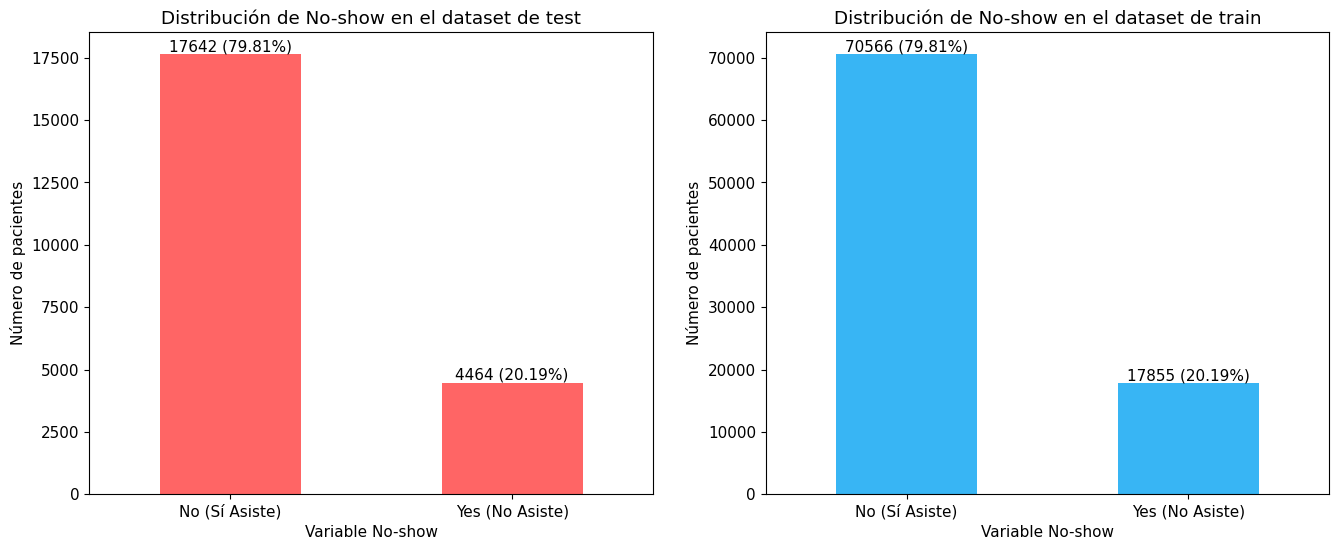

In [ ]:
# Crear una nueva figura con tamaño 16x6 pulgadas
plt.figure(figsize=(16, 6))

# Subtrama izquierda para el primer gráfico
plt.subplot(1, 2, 1)

# Se verifican los conjunto de test resultante
class_counts_test = test_df['No-show'].value_counts()
class_counts_test.plot(kind='bar', rot=0, color='#FF6565')
plt.xlabel('Variable No-show')
plt.ylabel('Número de pacientes')
plt.title('Distribución de No-show en el dataset de test')
for i, count in enumerate(class_counts_test):
    plt.text(i, count, f'{count} ({count / len(test_df) * 100:.2f}%)', ha='center', va='bottom')
# Cambiar los valores del eje X
plt.gca().set_xticklabels(['No (Sí Asiste)', 'Yes (No Asiste)'])

plt.subplot(1, 2, 2)

# Se verifican los conjunto de train resultante
class_counts_train = train_df['No-show'].value_counts()
class_counts_train.plot(kind='bar', rot=0, color='#38B5F4')
plt.xlabel('Variable No-show')
plt.ylabel('Número de pacientes')
plt.title('Distribución de No-show en el dataset de train')
for i, count in enumerate(class_counts_train):
    plt.text(i, count, f'{count} ({count / len(train_df) * 100:.2f}%)', ha='center', va='bottom')
# Cambiar los valores del eje X
plt.gca().set_xticklabels(['No (Sí Asiste)', 'Yes (No Asiste)'])

# 3.2) Feature Engeniering parte 2:
Se generan variables del dataset de entrenamiento: porcentaje de inasistencias de pacientes a sus citas, para no contaminar los datos de test, que son datos "futuros" y no contamos con esa información en un entorno de prueba real

In [ ]:
# Calcular la suma acumulativa de inasistencias ('No-show' == 1) por PatientId
train_df['Cumulative No-shows'] = train_df.groupby('PatientId')['No-show'].transform('cumsum')

# Calcular el número acumulativo de citas por PatientId
train_df['Cumulative Appointments'] = train_df.groupby('PatientId').cumcount() + 1

# Calcular la probabilidad acumulativa de inasistencia por cita
train_df['Cumulative No-show Probability'] = train_df['Cumulative No-shows'] / train_df['Cumulative Appointments']

# Asignar un valor de 0 a la primera cita de cada paciente utilizando transform para mantener el índice
train_df['Cumulative No-show Probability'] = train_df.groupby('PatientId')['Cumulative No-show Probability'].transform(lambda x: x.shift().fillna(0))

# Se elimina la columna 'Cumulative No-shows'
train_df.drop(columns=['Cumulative No-shows'], inplace=True)

In [ ]:
# Se observan los cambios
train_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_Before_Appointment,Appointment_DayOfWeek,Days Since Last Appointment,Cumulative Appointments,Cumulative No-show Probability
100517,3.921784e+04,5751990,0,20160531,20160603,44,56,0,0,0,0,0,0,0,219799.0,0,0.0,1,0.0
105430,4.374176e+04,5760144,1,20160601,20160601,39,43,0,0,1,0,0,0,0,-51778.0,5,0.0,1,0.0
3950,9.377953e+04,5712759,0,20160518,20160518,33,10,0,0,0,0,0,0,0,-33149.0,5,0.0,1,0.0
73228,5.376153e+05,5637728,0,20160429,20160506,14,23,0,0,0,0,0,1,0,578403.0,0,0.0,1,0.0
54611,5.628261e+06,5680449,1,20160510,20160513,13,52,0,0,0,0,0,0,1,216102.0,0,0.0,1,0.0
40692,1.183186e+07,5718578,1,20160519,20160519,16,69,0,0,0,0,0,0,0,-34927.0,3,0.0,1,0.0
58616,2.263866e+07,5580835,0,20160414,20160503,22,35,0,0,0,0,0,1,0,1614990.0,4,0.0,1,0.0
88585,2.263866e+07,5715081,0,20160518,20160608,23,35,0,0,0,0,0,1,0,1765368.0,5,34.0,2,0.0
83628,5.216894e+07,5704816,0,20160516,20160516,28,39,0,0,0,0,0,0,0,-60139.0,1,26.0,1,0.0
46340,5.422400e+07,5613714,1,20160425,20160511,32,36,0,0,0,0,0,1,0,1347822.0,5,0.0,1,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88421 entries, 100517 to 76224
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PatientId                       88421 non-null  float64
 1   AppointmentID                   88421 non-null  int64  
 2   Gender                          88421 non-null  int32  
 3   ScheduledDay                    88421 non-null  int32  
 4   AppointmentDay                  88421 non-null  int32  
 5   Age                             88421 non-null  int64  
 6   Neighbourhood                   88421 non-null  int32  
 7   Scholarship                     88421 non-null  int64  
 8   Hipertension                    88421 non-null  int64  
 9   Diabetes                        88421 non-null  int64  
 10  Alcoholism                      88421 non-null  int64  
 11  Handcap                         88421 non-null  int64  
 12  SMS_received                    

# 3.3) Se visualiza la correlación de datos

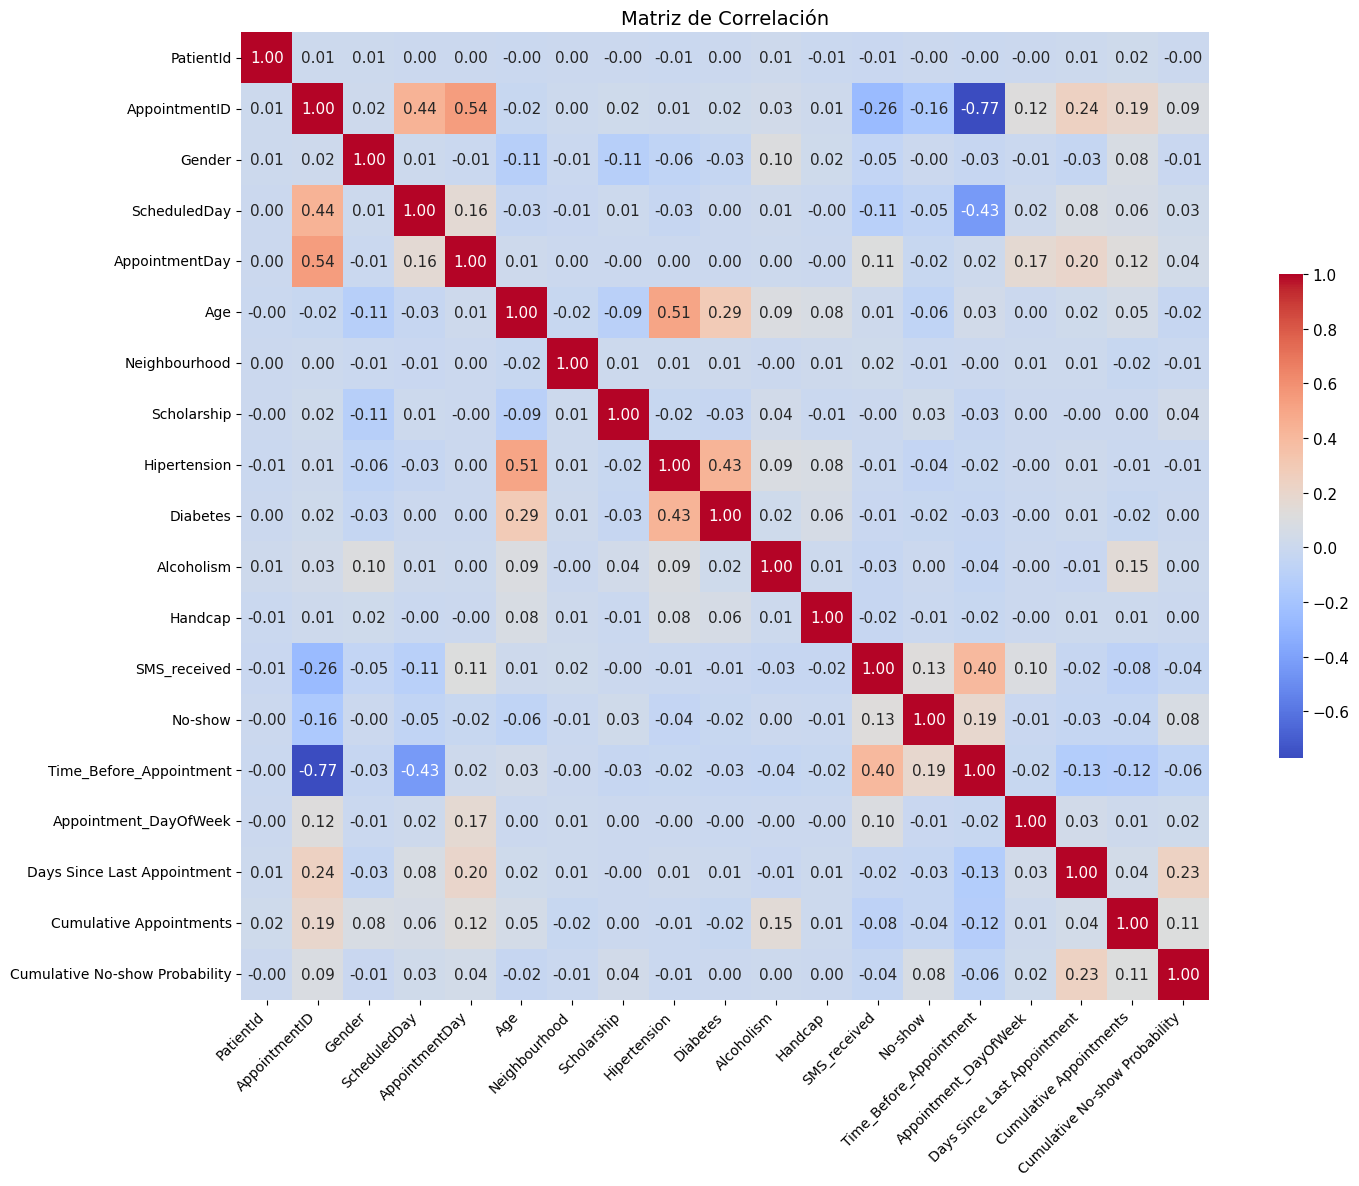

In [ ]:
# Se calcula la matriz de correlación
corr = train_df.corr()
plt.figure(figsize=(16, 12))

# Crear el heatmap con números anotados
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={'shrink': .5},
    xticklabels=corr.columns,
    yticklabels=corr.columns
)

plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(rotation=0, size=10)
plt.title('Matriz de Correlación', size=14)
plt.tight_layout()
plt.show()

In [ ]:
# Exportar el DataFrame a un archivo Excel
train_df.to_excel('train_df.xlsx', index=False)

# 3.4) Se cruza la informacion con el dataset de test

In [ ]:
# Se verifica que train_df y test_df sean valores del tipo str, para poder realizar la unión
train_df['PatientId'] = train_df['PatientId'].astype(str)
test_df['PatientId'] = test_df['PatientId'].astype(str)

# Se crea un DataFrame temporal con los valores únicos de 'PatientId', 'Cumulative No-show Probability' y 'Cumulative Appointments',
# Se selecciona el último registro por PatientId
temp_df = train_df.groupby('PatientId').tail(1)[['PatientId', 'Cumulative Appointments', 'Cumulative No-show Probability']]

# Resetear el índice de temp_df
temp_df.reset_index(drop=True, inplace=True)

In [ ]:
# Se visualizan los cambios
temp_df.head(10)

,PatientId,Cumulative Appointments,Cumulative No-show Probability
0,39217.84439,1,0.0
1,43741.75652,1,0.0
2,93779.52927,1,0.0
3,537615.28476,1,0.0
4,5628261.0,1,0.0
5,11831856.0,1,0.0
6,22638656.0,2,0.0
7,52168938.0,1,0.0
8,54223998.0,1,0.0
9,61433777.0,1,0.0


In [ ]:
# Exportar el DataFrame a un archivo Excel
temp_df.to_excel('temp_df.xlsx', index=False)

In [ ]:
# Se realiza la unión de los DataFrames
test_df = test_df.merge(temp_df, on='PatientId', how='left')

# Se asigna 0 a 'Cumulative No-show Probability' y 'Cumulative Appointments' en caso de que no haya una coincidencia, ya que significa que es la primera cita del paciente
test_df['Cumulative Appointments'].fillna(0, inplace=True)
test_df['Cumulative No-show Probability'].fillna(train_df['No-show'].mean(), inplace=True)

In [ ]:
# Se observan los cambios
test_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_Before_Appointment,Appointment_DayOfWeek,Days Since Last Appointment,Cumulative Appointments,Cumulative No-show Probability
0,758286294715.0,5650654,0,20160503,20160512,66,33,0,1,0,0,0,1,0,748893.0,3,0.0,0.0,0.201932
1,911594989391.0,5692028,0,20160512,20160519,43,75,0,0,0,0,0,0,0,553452.0,3,22.0,2.0,0.000000
2,6685555823843.0,5410963,0,20160301,20160502,74,38,0,0,0,0,0,1,0,5330289.0,1,0.0,3.0,0.000000
3,194877999558458.0,5654977,0,20160503,20160512,68,76,0,0,0,0,0,1,0,721226.0,3,1.0,2.0,0.000000
4,6879299542891.0,5683023,0,20160511,20160511,79,69,0,0,0,0,0,0,0,-25679.0,5,0.0,0.0,0.201932
5,643814388981185.0,5648958,0,20160502,20160516,0,77,0,0,0,0,0,0,0,1147858.0,1,0.0,1.0,0.000000
6,81364641647845.0,5578984,0,20160413,20160504,43,39,0,0,0,0,0,1,0,1763817.0,5,0.0,1.0,0.000000
7,6783416114778.0,5717953,1,20160519,20160519,17,76,0,0,0,0,0,0,0,-31199.0,3,5.0,4.0,0.333333
8,395476288231231.0,5728375,0,20160520,20160531,25,39,0,0,0,0,0,1,0,892178.0,4,38.0,1.0,0.000000
9,232235777468137.0,5542779,1,20160405,20160530,5,38,0,0,0,0,0,1,0,4718332.0,1,0.0,0.0,0.201932


# 3.5) Se elimina la información no relevante

In [ ]:
# Se elimina la informacion que no es relevante
train_df = train_df.drop(['PatientId'], axis=1)
test_df = test_df.drop(['PatientId'], axis=1)

In [ ]:
# Se verifican dimensiones de los conjuntos de datos
print(train_df.shape, test_df.shape)

(88421, 18) (22106, 18)


# 3.6) Se divide el conjunto de entrenamiento en características y etiquetas

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88421 entries, 100517 to 76224
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AppointmentID                   88421 non-null  int64  
 1   Gender                          88421 non-null  int32  
 2   ScheduledDay                    88421 non-null  int32  
 3   AppointmentDay                  88421 non-null  int32  
 4   Age                             88421 non-null  int64  
 5   Neighbourhood                   88421 non-null  int32  
 6   Scholarship                     88421 non-null  int64  
 7   Hipertension                    88421 non-null  int64  
 8   Diabetes                        88421 non-null  int64  
 9   Alcoholism                      88421 non-null  int64  
 10  Handcap                         88421 non-null  int64  
 11  SMS_received                    88421 non-null  int64  
 12  No-show                         

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AppointmentID                   22106 non-null  int64  
 1   Gender                          22106 non-null  int32  
 2   ScheduledDay                    22106 non-null  int32  
 3   AppointmentDay                  22106 non-null  int32  
 4   Age                             22106 non-null  int64  
 5   Neighbourhood                   22106 non-null  int32  
 6   Scholarship                     22106 non-null  int64  
 7   Hipertension                    22106 non-null  int64  
 8   Diabetes                        22106 non-null  int64  
 9   Alcoholism                      22106 non-null  int64  
 10  Handcap                         22106 non-null  int64  
 11  SMS_received                    22106 non-null  int64  
 12  No-show                         

In [ ]:
# Se divide el conjunto de entrenamiento en características y etiquetas
X_train = train_df.drop('No-show', axis=1)
y_train = train_df['No-show']
X_test = test_df.drop('No-show', axis=1)
y_test = test_df['No-show']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88421 entries, 100517 to 76224
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AppointmentID                   88421 non-null  int64  
 1   Gender                          88421 non-null  int32  
 2   ScheduledDay                    88421 non-null  int32  
 3   AppointmentDay                  88421 non-null  int32  
 4   Age                             88421 non-null  int64  
 5   Neighbourhood                   88421 non-null  int32  
 6   Scholarship                     88421 non-null  int64  
 7   Hipertension                    88421 non-null  int64  
 8   Diabetes                        88421 non-null  int64  
 9   Alcoholism                      88421 non-null  int64  
 10  Handcap                         88421 non-null  int64  
 11  SMS_received                    88421 non-null  int64  
 12  Time_Before_Appointment         

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AppointmentID                   22106 non-null  int64  
 1   Gender                          22106 non-null  int32  
 2   ScheduledDay                    22106 non-null  int32  
 3   AppointmentDay                  22106 non-null  int32  
 4   Age                             22106 non-null  int64  
 5   Neighbourhood                   22106 non-null  int32  
 6   Scholarship                     22106 non-null  int64  
 7   Hipertension                    22106 non-null  int64  
 8   Diabetes                        22106 non-null  int64  
 9   Alcoholism                      22106 non-null  int64  
 10  Handcap                         22106 non-null  int64  
 11  SMS_received                    22106 non-null  int64  
 12  Time_Before_Appointment         

# 4) Se estandarizan las bases de datos

In [ ]:
# Guardar los nombres de las columnas
column_names = X_train.columns

# Se crea una instancia de StandardScaler
scaler = StandardScaler()

# Se ajusta el escalador a los datos de entrenamiento y se transforman
X_train = scaler.fit_transform(X_train)
# Se transforman los datos de test utilizando el mismo escalador que se ajustó a los datos de entrenamiento
X_test = scaler.transform(X_test)

# Convertir los resultados a DataFrame para facilitar la manipulación y visualización,
# utilizando los nombres de las columnas guardados previamente
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Número de características en el DataFrame
num_features = X_train_df.shape[1]

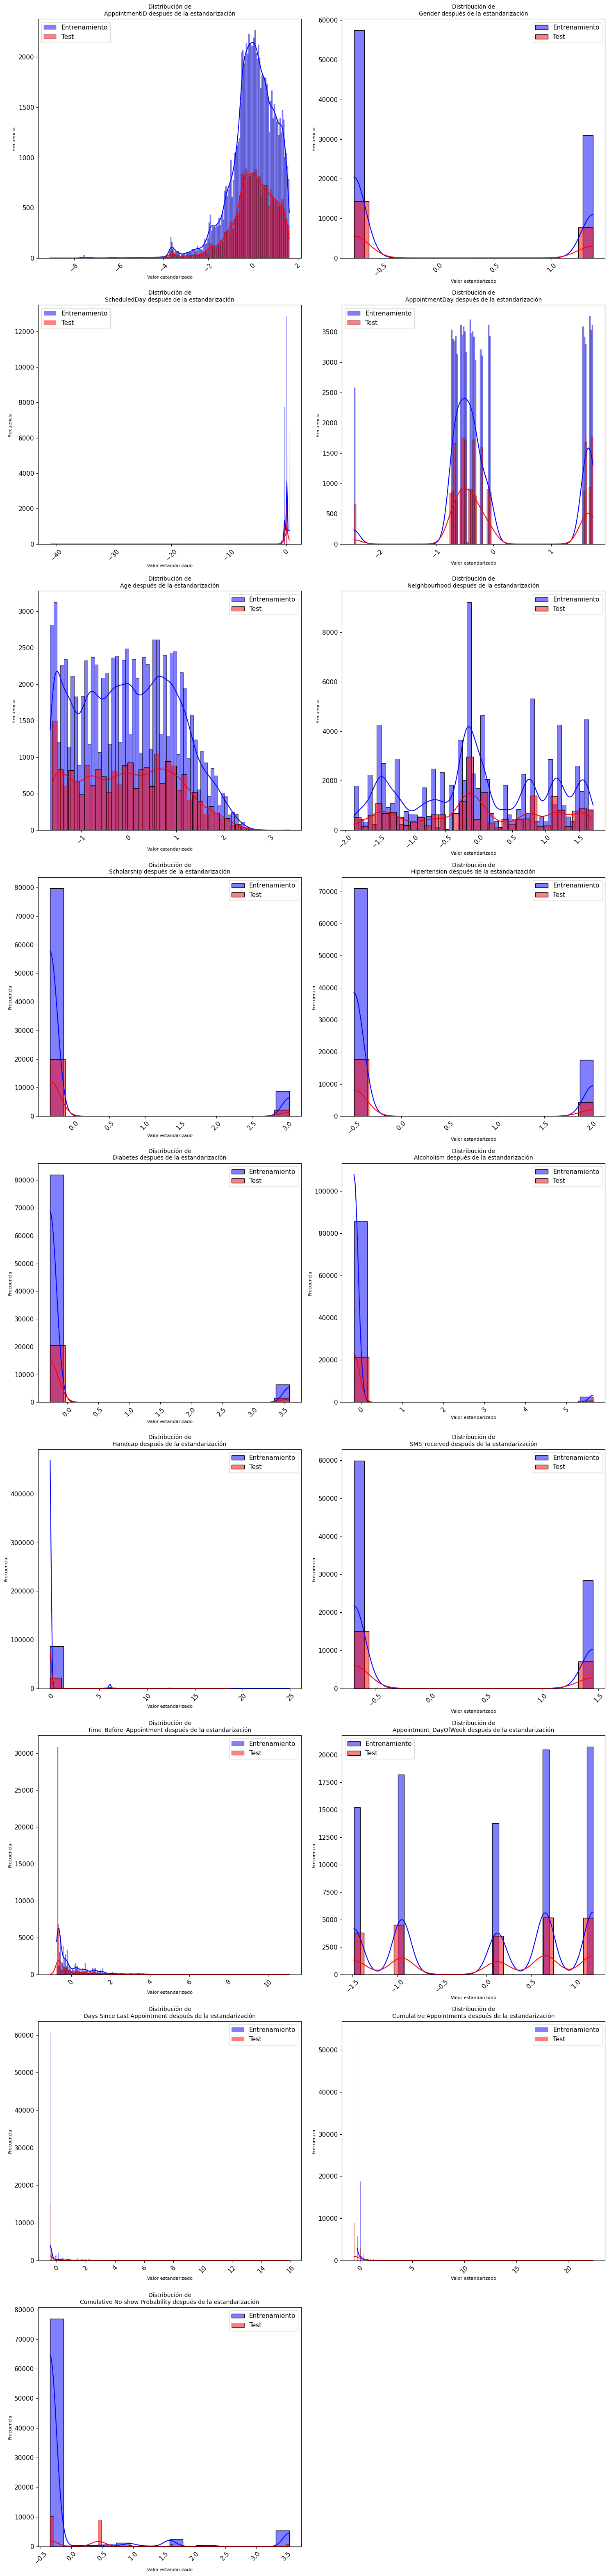

In [ ]:
# Número de columnas para los subgráficos
num_columns = 2

# Calcular el número de filas basado en el número de características y columnas
num_rows = num_features // num_columns + (num_features % num_columns > 0)


# Crear una figura grande para acomodar todos los subgráficos
plt.figure(figsize=(15, 7 * num_rows))

# Crear un histograma para cada característica
for i in range(num_features):
    plt.subplot(num_rows, num_columns, i+1)

    # Histograma de los datos de entrenamiento en azul
    sns.histplot(X_train_df.iloc[:, i], kde=True, color='blue', alpha=0.5, label='Entrenamiento')

    # Histograma de los datos de test en rojo
    sns.histplot(X_test_df.iloc[:, i], kde=True, color='red', alpha=0.5, label='Test')

    # Usar un salto de línea para dividir el título en dos líneas
    plt.title(f'Distribución de\n{column_names[i]} después de la estandarización', fontsize=10)

    plt.xlabel('Valor estandarizado', fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    plt.xticks(rotation=45)
    plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

# 5) Se realiza balanceo de clases en el dataset de entrenamiento

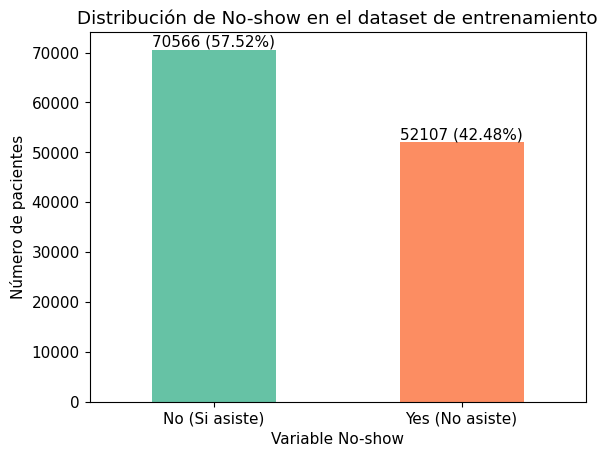

In [ ]:
# Se crea una instancia de SMOTE y ENN
smote = SMOTE(sampling_strategy='auto', random_state=42)
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)

# Se crea una instancia de la clase Pipeline
pipeline = Pipeline([('smote', smote), ('enn', enn)])

# Se aplica el pipeline a los datos
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Distribución del dataset posterior a la aplicación de SMOTE-ENN
class_counts = y_train_resampled.value_counts()

# Se define el gráfico con los parámetros adicionales solicitados
class_counts.plot(kind='bar', rot=0, color=['#66c2a5', '#fc8d62'])

# Se añaden etiquetas y título al gráfico
plt.xlabel('Variable No-show')
plt.ylabel('Número de pacientes')
plt.title('Distribución de No-show en el dataset de entrenamiento')

# Se añaden los porcentajes en las barras
for i, count in enumerate(class_counts):
    plt.text(i, count, f'{count} ({count / len(X_train_resampled) * 100:.2f}%)', ha='center', va='bottom')

# Se establecen las etiquetas en el eje X
plt.xticks([0, 1], ['No (Si asiste)', 'Yes (No asiste)'])

# Se muestra el gráfico
plt.show()

# 6) Reduccion de dimensionalidad

In [ ]:
# Aplicar PCA para reducir la dimensionalidad mientras se conserva la mayor cantidad de varianza posible
pca = PCA(n_components=0.95)

# Ajustar y transformar los datos de entrenamiento
X_train_resampled_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

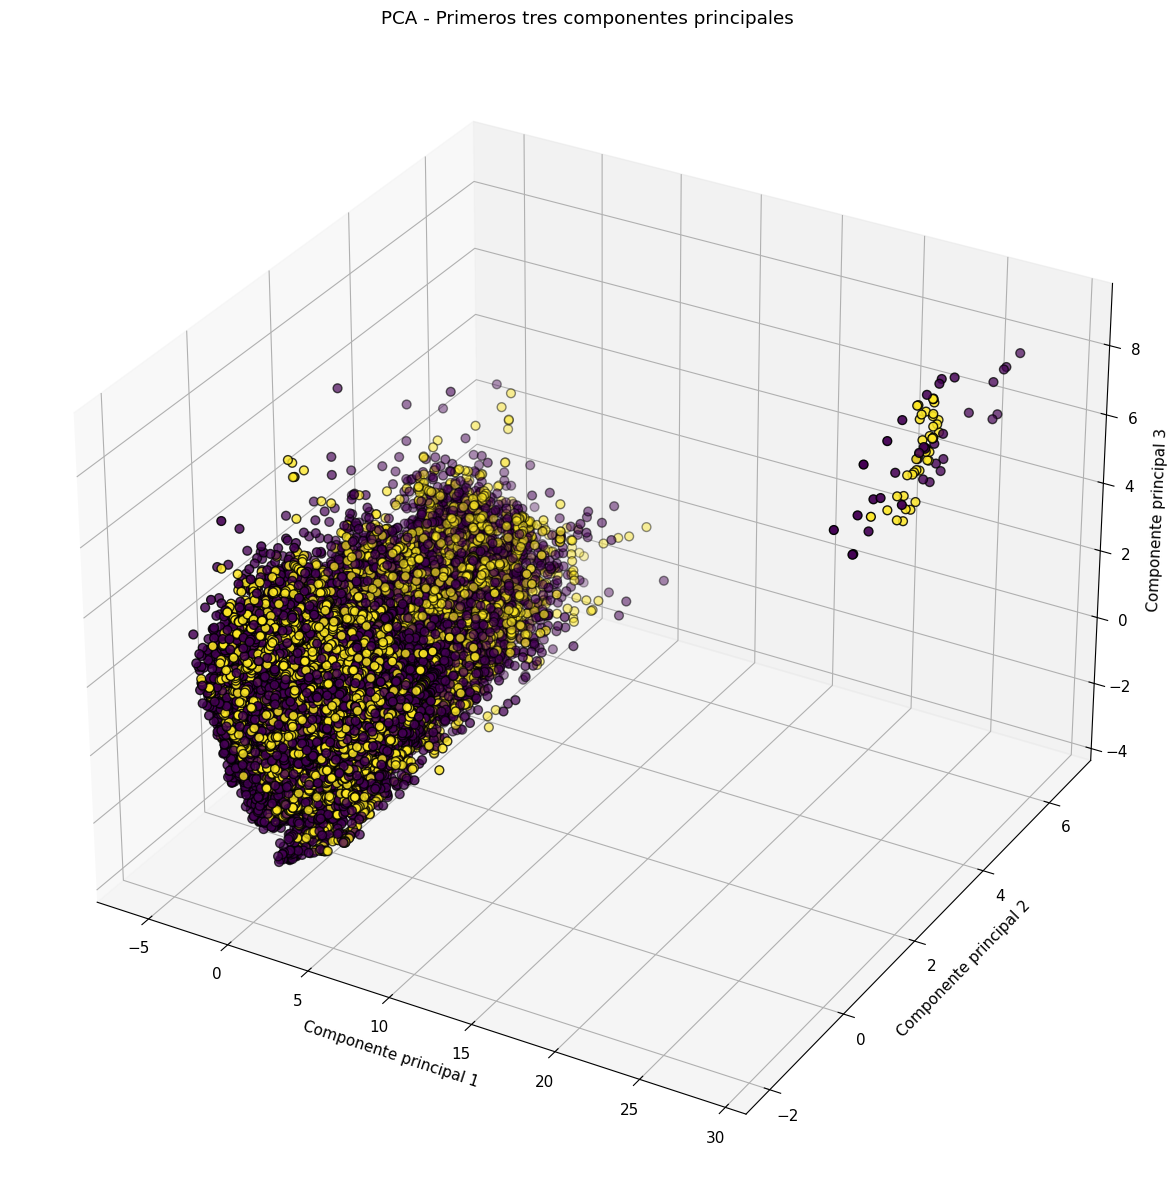

Número de componentes: 15
Varianza explicada por cada componente: [0.1516217  0.10704757 0.08430615 0.07521865 0.06920056 0.06480736
 0.05830185 0.05560624 0.05271198 0.05128078 0.04943563 0.04441703
 0.03807837 0.03658694 0.03412546]
Varianza total explicada: 0.9727462951163807


In [ ]:
# Graficar los primeros tres componentes principales en un gráfico 3D
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_resampled_pca[:, 0], X_train_resampled_pca[:, 1], X_train_resampled_pca[:, 2], c=y_train_resampled, cmap='viridis', edgecolor='k', s=40)
ax.set_title('PCA - Primeros tres componentes principales')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
plt.show()

# Imprimir la cantidad de componentes y la varianza explicada
print(f"Número de componentes: {pca.n_components_}")
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {np.sum(pca.explained_variance_ratio_)}")

In [ ]:
#Se guardan los datos de entrenamiento y test en archivos csv
with open('X_train.pkl', 'wb') as file:
    pickle.dump(X_train_resampled_pca, file)
# Guardar y_train
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train_resampled, file)
# Guardar X_test
with open('X_test.pkl', 'wb') as file:
    pickle.dump(X_test_pca, file)
# Guardar y_test
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

# 7) Entrenamiento de modelos de Machine Learning:

In [ ]:
# Se cargan los datos de entrenamiento y test desde los archivos csv
with open('X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)
with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)
with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)
with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122673, 15)
(122673,)
(22106, 15)
(22106,)


In [ ]:
#Se verifica la base de datos con las que se entrenará el modelo
X_train.shape, y_train.shape

# Se verifican los valores unicos de la variable objetivo en el dataset de entrenamiento
y_train.value_counts()

No-show
0    70566
1    52107
Name: count, dtype: int64

In [ ]:
# Se verifica la base de datos con las que se testeara el modelo
X_test.shape, y_test.shape

# Se verifican los valores unicos de la variable objetivo en el dataset de test
y_test.value_counts()

No-show
0    17642
1     4464
Name: count, dtype: int64

In [ ]:
# Se define un peso para las clases segun la distribución de las mismas en el dataset de test
class_counts_test = y_test.value_counts()
peso_clase_mayoritaria = class_counts_test[1] / len(y_test)
peso_clase_minoritaria = class_counts_test[0] / len(y_test)
class_weight = {0: peso_clase_mayoritaria, 1: peso_clase_minoritaria}
print (class_weight)

{0: 0.2019361259386592, 1: 0.7980638740613408}


In [ ]:
# Se crea una función para evaluar los modelos de clasificación
def evaluar_modelo(modelo, parametros, X_train, y_train, X_test, y_test):

    labels = ['Asiste', 'No-show']
    # Se obtienen los mejores parámetros y el mejor modelo
    best_params = parametros
    best_model = modelo
    # Puntuaciones/probabilidades de la clase positiva
    y_scores_train = cross_val_predict(best_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

    # Se calcula la predicción del modelo en el conjunto de entrenamiento con validación cruzada
    y_pred_train = cross_val_predict(best_model, X_train, y_train, cv=5)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_score_train = f1_score(y_train, y_pred_train)

    print(f"Mejores parámetros encontrados: {best_params}")
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento con validación cruzada:") + '\n' + "Resultados datos de entrenamiento con validación cruzada:" + '\033[0m')
    print("Accuracy: (Datos Train)", accuracy_train)
    print("Precision: (Datos Train)", precision_train)
    print("Recall: (Datos Train)", recall_train)
    print("F1 Score: (Datos Train)", f1_score_train)
    # Se  hace print de los datos totales de los datos de entrenamiento
    print("Total de datos de entrenamiento:", len(y_train))
    print("Datos de entrenamiento con etiqueta 0:", len(y_train[y_train == 0]))
    print("Datos de entrenamiento con etiqueta 1:", len(y_train[y_train == 1]))

    # Matriz de confusión y curva ROC (datos de entrenamiento)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    conf_matrix = confusion_matrix(y_train, y_pred_train)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0])
    ax[0].set_title('Matriz de Confusión (Datos de Train)')
    ax[0].set_xlabel('Valores Predichos')
    ax[0].set_ylabel('Valores Reales')
    print (conf_matrix)

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_train, y_scores_train)
    roc_auc = auc(fpr, tpr)

    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Tasa de Falsos Positivos')
    ax[1].set_ylabel('Tasa de Verdaderos Positivos')
    ax[1].set_title('Curva ROC (Datos de Train)')
    ax[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Hacer predicciones con el mejor modelo en el conjunto de test
    y_pred_test = best_model.predict(X_test)
    # Puntuaciones/probabilidades de la clase positiva
    y_scores_test = modelo.predict_proba(X_test)[:, 1]

    # Calcular y presentar las métricas de evaluación para los datos de test
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_score_test = f1_score(y_test, y_pred_test)

    print('\033[1m' + '.' * len("Resultados datos de test con el mejor modelo:") + '\n' + "Resultados datos de test con el mejor modelo:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}")
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_score_test:}")
    # Se  hace print de los datos totales de los datos de test
    print("Total de datos de test:", len(y_test))
    print("Datos de test con etiqueta 0:", len(y_test[y_test == 0]))
    print("Datos de test con etiqueta 1:", len(y_test[y_test == 1]))

    # Matriz de confusión y curva ROC (datos de test)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    conf_matrix = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, ax=ax[0])
    ax[0].set_title('Matriz de Confusión (Datos de Test)')
    ax[0].set_xlabel('Valores Predichos')
    ax[0].set_ylabel('Valores Reales')
    print (conf_matrix)

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_test)
    roc_auc = auc(fpr, tpr)

    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Tasa de Falsos Positivos')
    ax[1].set_ylabel('Tasa de Verdaderos Positivos')
    ax[1].set_title('Curva ROC (Datos de Test)')
    ax[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

7.1 Entrenamiento Regresión Logisitica

In [ ]:
# Nombre del archivo donde se guardará/cargará el modelo
nombre_modelo = 'best_logistic_regression.joblib'
nombre_params = 'best_params_logistic_regression.json'

if os.path.exists(nombre_modelo) and os.path.exists(nombre_params):
    best_model_logistic_regresion = joblib.load(nombre_modelo)
    with open(nombre_params, 'r') as file:
        best_params_logistic_regresion = json.load(file)
    print("Modelo cargado desde el archivo.")
else:
    # Diccionario de parámetros a probar extendiendo el espacio de búsqueda
    param_grid = {
        'max_iter': [1000, 2000, 3000, 4000, 5000],
        'C': [0.1e-10, 0.1e-09, 0.1e-08, 0.1e-07, 0.1e-06, 0.1e-05, 0.1e-04, 0.1e-03, 0.01, 0.1, 1, 10, 100, 1000], # C controla la regularización, sirve para evitar el sobreajuste, a menor C, mayor regularización lo que implica un modelo más simple, con mayor C, el modelo se ajusta más a los datos de entrenamiento
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

    # Crear una instancia de GridSearchCV optimizada para la precisión
    grid_search = GridSearchCV(LogisticRegression(class_weight=class_weight), param_grid, cv=5, scoring='precision', n_jobs=-1)

    # Ajustar GridSearchCV
    grid_search.fit(X_train, y_train)

    # Guardar el mejor modelo
    best_model_logistic_regresion = grid_search.best_estimator_

    # Guardar el modelo en el archivo
    joblib.dump(best_model_logistic_regresion, nombre_modelo)
    print("Modelo entrenado y guardado en el archivo.")
    # Guardar los mejores parámetros en un archivo JSON
    best_params_logistic_regresion = grid_search.best_params_
    with open(nombre_params, 'w') as file:
        json.dump(best_params_logistic_regresion, file)

# Evaluar el modelo (tanto si se acaba de entrenar como si se ha cargado desde un archivo)
evaluar_modelo(best_model_logistic_regresion, best_params_logistic_regresion, X_train, y_train, X_test, y_test)


7.2 Entrenamiento de DecisionTreeClassifier

In [ ]:
# Nombre del archivo donde se guardará/cargará el modelo
nombre_modelo = 'best_model_tree.joblib'
nombre_params = 'best_params_tree.json'

if os.path.exists(nombre_modelo) and os.path.exists(nombre_params):
    best_model_tree = joblib.load(nombre_modelo)
    with open(nombre_params, 'r') as file:
        best_params_tree = json.load(file)
        grid_search = best_params_tree
    print("Modelo cargado desde el archivo.")
else:
    # Diccionario de parámetros a probar extendiendo el espacio de búsqueda
    param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 15],  # Número de muestras para dividir
    'min_samples_leaf': [1, 2, 5, 10],  # Múmero de muestras en un nodo hoja
    'criterion': ['gini', 'entropy'],  # Función para medir el grado de impureza
    'max_features': ['auto', 'sqrt', 'log2', None],  # Número de características
    'max_leaf_nodes': [None, 10, 20, 30, 40],  # Número máximo de nodos hoja
    'min_impurity_decrease': [0.0, 0.01, 0.02]  # Umbral para la reducción de la impureza
}

   # Crear una instancia de GridSearchCV, optimizada para la precisión
    grid_search = GridSearchCV(DecisionTreeClassifier(class_weight=class_weight), param_grid, cv=5, scoring='precision', n_jobs=-1)

   # Ajustar GridSearchCV a los datos
    grid_search.fit(X_train, y_train)

    # Guardar el mejor modelo
    best_model_tree = grid_search.best_estimator_

    # Guardar el modelo en el archivo
    joblib.dump(best_model_tree, nombre_modelo)
    print("Modelo entrenado y guardado en el archivo.")
    # Guardar los mejores parámetros en un archivo JSON
    best_params_tree = grid_search.best_params_
    with open(nombre_params, 'w') as f:
        json.dump(best_params_tree, f)

# Evaluar el modelo (tanto si se acaba de entrenar como si se ha cargado desde un archivo)
evaluar_modelo (best_model_tree, grid_search, X_train, y_train, X_test, y_test)

7.3 Entrenamiento de Support Vector Machine

In [ ]:
# Nombre del archivo donde se guardará/cargará el modelo
nombre_modelo = 'best_model_svm.joblib'
nombre_params = 'best_params_svm.json'

if os.path.exists(nombre_modelo) and os.path.exists(nombre_params):
    best_model_svm = joblib.load(nombre_modelo)
    with open(nombre_params, 'r') as file:
        best_params_svm = json.load(file)
    print("Modelo cargado desde el archivo.")
else:
    # Diccionario de parámetros a probar
    param_grid = {
        'C': [0.1, 1, 10],  # Parámetro de regularización, controla el sobreajuste
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel, permite separaciones no lineales
        'gamma': ['scale', 'auto'],  # Coeficiente de kernel para 'rbf', 'poly' y 'sigmoid', controla el sobreajuste
        'probability': [True]  # Permite el cálculo de probabilidades
    }

    # Crear una instancia de GridSearchCV optimizada para la precisión
    grid_search = GridSearchCV(SVC(class_weight=class_weight), param_grid, cv=5, scoring='precision', verbose=10, n_jobs=-1)

    # Ajustar GridSearchCV
    grid_search.fit(X_train, y_train)

    # Guardar el mejor modelo
    best_model_svm = grid_search.best_estimator_

    # Guardar el modelo en el archivo
    joblib.dump(best_model_svm, nombre_modelo)
    # Guardar los mejores parámetros en el archivo
    best_params_svm = grid_search.best_params_
    with open(nombre_params, 'w') as file:
        json.dump(grid_search.best_params_, file)
    print("Modelo entrenado y guardado en el archivo.")

# Evaluar el modelo (tanto si se acaba de entrenar como si se ha cargado desde un archivo)
evaluar_modelo (best_model_svm, best_params_svm, X_train, y_train, X_test, y_test)



8 Entrranamiento de redes neuronales

In [ ]:
#Se importan las librerias necesarias para el uso de pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Se define el dispositivo a utilizar
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# Se define la funcion para grafiar la perdida por epoca
def graficar_progreso(losses, inicio_folds, grado=3):
    plt.figure(figsize=(20, 10))
    # Gráfico original
    plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='blue', label='Pérdida Real')

     # Marcar y anotar el inicio de cada fold
    for i, inicio in enumerate(inicio_folds):
        plt.axvline(x=inicio, color='black', linestyle='--', lw=1)
        plt.text(inicio, max(losses)*0.95, f'Inicio Fold {i+1}', rotation=90, color='black', fontsize=12, fontweight='bold')

    # Ajustando la curva de tendencia
    z = np.polyfit(range(1, len(losses) + 1), losses, grado)  # Ajuste polinomial
    p = np.poly1d(z)  # Creación de un polinomio
    plt.plot(range(1, len(losses) + 1), p(range(1, len(losses) + 1)), "r--", label='Curva de Tendencia')  # Curva de tendencia en rojo

    # Configuración del gráfico
    plt.title('Pérdida por Época a través de los Folds')
    plt.xlabel('Época Total')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Se define la función para evaluar el modelo
def evaluar_modelo_pytorch(model, X_train_tensor, y_train, X_test_tensor, y_test):
    # Evaluación con datos de entrenamiento
    y_pred = model(X_train_tensor).detach().cpu().numpy()
    y_pred_bin = (y_pred > 0.5).astype(int)

    # Cálculo de métricas para datos de entrenamiento
    accuracy = accuracy_score(y_train, y_pred_bin)
    precision = precision_score(y_train, y_pred_bin)
    recall = recall_score(y_train, y_pred_bin)
    f1 = f1_score(y_train, y_pred_bin)

    # Visualización de métricas y gráficos para datos de entrenamiento
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento:") + '\n' + "Resultados datos de entrenamiento:" + '\033[0m')
    print(f"Accuracy (Datos de Train): {accuracy}")
    print(f"Precision (Datos de Train): {precision}")
    print(f"Recall (Datos de Train): {recall}")
    print(f"F1 Score (Datos de Train): {f1}")

    # Gráficos para datos de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    conf_matrix = confusion_matrix(y_train, y_pred_bin)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Train)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print (conf_matrix)

    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Train)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Evaluación con datos de prueba
    y_pred_test = model(X_test_tensor).detach().cpu().numpy()
    y_pred_test_bin = (y_pred_test > 0.5).astype(int)

    # Cálculo de métricas para datos de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test_bin)
    precision_test = precision_score(y_test, y_pred_test_bin)
    recall_test = recall_score(y_test, y_pred_test_bin)
    f1_test = f1_score(y_test, y_pred_test_bin)

    # Visualización de métricas y gráficos para datos de prueba
    print('\033[1m' + '.' * len("Resultados datos de test:") + '\n' + "Resultados datos de test:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}")
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_test}")

    # Gráficos para datos de prueba
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    conf_matrix_test = confusion_matrix(y_test, y_pred_test_bin)
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Test)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print (conf_matrix_test)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Test)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()


In [ ]:
#Se verifica si el modelo ya ha sido entrenado
class NeuralNet(nn.Module):
    # Definir la arquitectura del modelo
        def __init__(self, input_size):
            super(NeuralNet, self).__init__()
            self.layer1 = nn.Linear(input_size, 256) #  Capa oculta 1
            self.bn1 = nn.BatchNorm1d(256) # Batch Normalization (BN), sirve para acelerar el entrenamiento y mejorar la precisión
            self.relu1 = nn.ReLU() # Función de activación ReLU, sirve para introducir no linealidades en la red, permitiendo que el modelo aprenda relaciones más complejas

            self.layer2 = nn.Linear(256, 1024) #  Capa oculta 2
            self.relu2 = nn.ReLU()
            self.bn2 = nn.BatchNorm1d(1024)
            self.dropout1 = nn.Dropout(0.5) # Dropout, sirve para evitar el sobreajuste desactivando aleatoriamente un porcentaje de las neuronas, en este caso, el 50%

            self.layer3 = nn.Linear(1024, 256) # Capa oculta 3
            self.relu3 = nn.ReLU()
            self.bn3 = nn.BatchNorm1d(256)
            self.dropout2 = nn.Dropout(0.5)

            self.output_layer = nn.Linear(256, 1) # Capa de salida
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            out = self.bn1(self.layer1(x))  # Primero aplicar BN a la salida de la capa lineal
            out = self.relu1(out)

            out = self.bn2(self.layer2(out))
            out = self.relu2(out)
            out = self.dropout1(out)

            out = self.bn3(self.layer3(out))
            out = self.relu3(out)
            out = self.dropout2(out)

            out = self.output_layer(out)
            out = self.sigmoid(out)
            return out
# Instanciar el modelo
model = NeuralNet(X_train.shape[1]).to(device)

# Se verifica si el modelo ya ha sido entrenado
if os.path.exists('modelo_pytorch.pth'):
    model.load_state_dict(torch.load('modelo_pytorch.pth'))
    print("Modelo cargado desde el archivo.")
else:
    # Se definen los folds
    skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    num_epochs = 100
    fold_results = []
    losses = []
    inicio_folds = [1]  # La primera época siempre es el inicio del primer fold
    epoca_actual = 0

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

    for fold, (train_index, test_index) in enumerate(skfolds.split(X_train, y_train)):
        print(f'Comenzando el fold {fold+1}')

        X_train_fold = X_train[train_index]
        y_train_fold = y_train[train_index]
        X_valid_fold = X_train[test_index]
        y_valid_fold = y_train[test_index]

        X_train_fold_tensor = torch.tensor(X_train_fold).float().to(device)
        y_train_fold_tensor = torch.tensor(y_train_fold.to_numpy()[:, None]).float().to(device)
        X_valid_fold_tensor = torch.tensor(X_valid_fold).float().to(device)
        y_valid_fold_tensor = torch.tensor(y_valid_fold.to_numpy()[:, None]).float().to(device)

        train_loader = DataLoader(TensorDataset(X_train_fold_tensor, y_train_fold_tensor), batch_size=64, shuffle=True)
        valid_loader = DataLoader(TensorDataset(X_valid_fold_tensor, y_valid_fold_tensor), batch_size=64)

        epoch_losses = []

        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
            scheduler.step()

            model.eval()
            val_losses = []
            with torch.no_grad():
                for inputs, targets in valid_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    val_losses.append(loss.item())

            epoch_train_loss = torch.tensor(train_losses).mean().item()
            epoch_val_loss = torch.tensor(val_losses).mean().item()
            epoch_losses.append((epoch_train_loss, epoch_val_loss))
            # Se añade la pérdida de validación a la lista global
            losses.append(epoch_val_loss)
            print(f'Fold {fold+1}, Epoch {epoch+1}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

        fold_results.append({
            'fold': fold+1,
            'epoch_losses': epoch_losses,
        })
        # Se añade el número de la última época de este fold al inicio de la lista
        if fold < skfolds.n_splits - 1:
            epoca_actual += num_epochs
            inicio_folds.append(epoca_actual + 1)

    # Se guarda el modelo
    torch.save(model.state_dict(), 'modelo_pytorch.pth')

# Se grafica el progreso de la pérdida a través de los folds
graficar_progreso(losses, inicio_folds, grado=3)

# Se convierten los datos de test a tensores
X_test_tensor = torch.tensor(X_test).float().to(device)

# Se evalúa el modelo entrenado
evaluar_modelo_pytorch(model, X_train_fold_tensor, y_train_fold, X_test_tensor, y_test)
